# Clustering of PCA Outputs

Now that we have the PCA reduction of the enriched company descriptions, we will run a K means clustering on the transformed data to identify distinct groups of companies based on their categorical and textual attributes.

In [20]:
# Lets import all the necessary libraries for clustering

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Data

We have our PCA data stored from earlier in our github repository:

https://github.com/Jesslga/SIADS-Milestone-II-Group-19

Im going to initalize it into the variable 'pca'

In [21]:
url = 'https://raw.githubusercontent.com/Jesslga/SIADS-Milestone-II-Group-19/main/pca_data%20(1).csv'
pca = pd.read_csv(url)

## Dertermine the Optimal Number of Clusters

We can best determine the optimal number of clusters for our K-Means clustering by employing the Elbow Method, ensuring that our groupings are both meaningful and well-separated. This approach evaluates the diminishing marginal return for each number of clusters to determine  the inflection point (or elbow point), which we can then use as a heuristic for selecting an appropriate number of clusters.



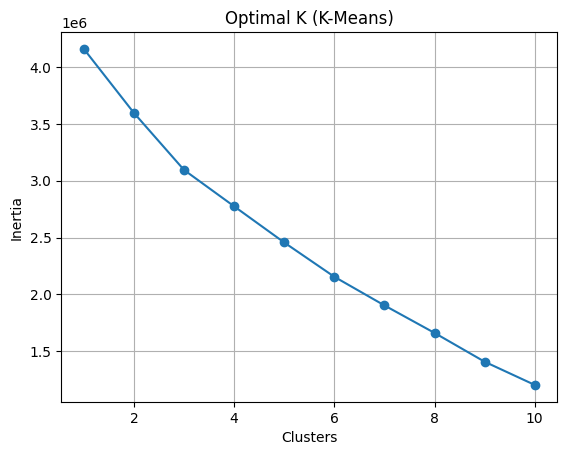

In [22]:
inertia = []

train = pca.drop('name', axis=1)

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(train)
    inertia.append(model.inertia_)

plt.plot(range(1,11),inertia,marker='o')
plt.title('Optimal K (K-Means)')
plt.xlabel('Clusters')
3plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Elbow Analysis
Based on the evaluation of our elbow plot, we observe a clear inflection point at K = 4, where the rate of decrease in inertia begins to level off—indicating that increasing the number of clusters beyond this provides limited benefit.

Informed by our elbow analysis, We can run the K-Means model using 4 clusters, offering the best balance between model simplicity and meaningful group separation.

In [28]:
# Run the K Mewans with 4 Clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
pca_numeric = pca.drop('name', axis=1)
train['cluster'] = kmeans.fit_predict(pca_numeric)

# Add clusters to original dataframe
pca['cluster'] = train['cluster']

# Cluster visualization

Now that we have applied our clustering, lets create a visulization to better understand the structure of our data.

By plotting the first two principal components (PC1 and PC2), colored by cluster assignment, the clear separation between the four identified clusters becomes apparent. Particularly along PC1. Cluster 3 (red) is most isolated in the upper left, while Clusters 0, 1, and 2 are more horizontally distributed along PC1. This is a good indication of possible variation in our underlying features.

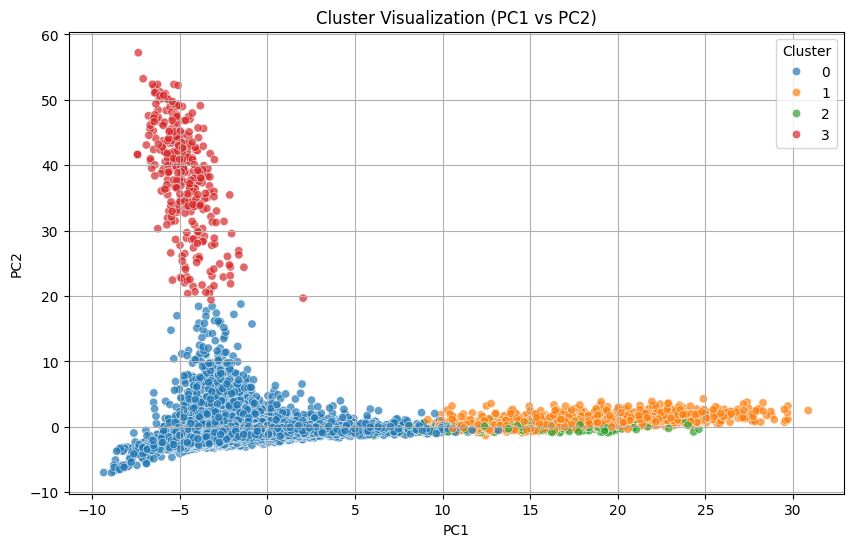

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca, x='PC1', y='PC2', hue='cluster', palette='tab10', alpha=0.7)
plt.title('Cluster Visualization (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Saving Clustered Data for Supervised Modeling

Now that we have sucessfully creatd our clustering, we will export the clustered dataset as a CSV file (clustered_companies.csv) to be used as input for the supervised learning portion of our project where we will predict the services for our clients.

These clusterings will aid in training our services prediction model. By treating the identified clusters as categorical outcomes, we can now explore how well a supervised model can learn to predict a company’s likely group based on its features and which services are aligned with those cluster characteristics.

In [31]:
pca.to_csv('clustered_companies.csv', index=False)

In [ ]:
o_g.to_csv('clustered_companies.csv', index=False)